In [79]:
%matplotlib notebook
import csv
from scipy.spatial.transform import Rotation as R
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

file = "video_log_labels/participant_video_csvs/9-29-2020-Furhat__8687.csv"
fileTimings = "video_log_labels/5455_gazetargets.txt"

#file = "video_log_labels/participant_video_csvs/9-18-2020-Furhat__4041.csv"
#fileTimings = "video_log_labels/4041_gazetargets.txt"

anglesLeft = []
anglesRight = []

with open(file, newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
     for row in spamreader:
         anglesLeft.append([row[i] for i in [1,2,3]])
         anglesRight.append([row[i] for i in [1,4,5]])

timingsToTargetLeft = []
timingsToTargetRight = []
with open(fileTimings, newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
     for row in spamreader:
        if row[0].find("Left") != -1:
            timingsToTargetLeft.append([row[i] for i in [3,6,11]])
        else:
            timingsToTargetRight.append([row[i] for i in [3,6,11]])
            


[['time_elapsed (s)', 'left angle vertical', 'left angle horizontal'], ['0.1', '-11', '38'], ['0.2', '-11', '37'], ['0.3333333333333333', '-7', '34'], ['0.43333333333333335', '-9', '37'], ['0.5666666666666667', '-9', '37'], ['0.7', '-5', '35'], ['0.8', '-11', '36'], ['0.9333333333333333', '-4', '25'], ['1.0666666666666667', '-6', '28'], ['1.1666666666666667', '-8', '34'], ['1.3', '-11', '35'], ['1.4333333333333333', '3', '-30'], ['1.5666666666666667', '-13', '35'], ['1.6666666666666667', '-8', '28'], ['1.8', '-12', '33'], ['1.9333333333333333', '-6', '18'], ['2.0666666666666664', '-7', '18'], ['2.1666666666666665', '-17', '-25'], ['2.2666666666666666', '0', '-39'], ['2.3666666666666667', '-14', '7'], ['2.466666666666667', '0', '-33'], ['2.6', '26', '-7'], ['2.7', '-10', '-17'], ['2.8333333333333335', '4', '-41'], ['2.966666666666667', '6', '-38'], ['3.1', '6', '-38'], ['3.2', '6', '-36'], ['3.3333333333333335', '1', '-49'], ['3.466666666666667', '6', '-46'], ['3.6', '6', '-46'], ['3.73

In [63]:
def angleToPointOnCircle(angle, radius=1, origin=[0,0]):
    #r = R.from_euler('zyx', [
    #[0, 0, angle[0]],
    #[0, angle[1], 0],
    #[0, 0, 0]], degrees=True)
    yaw = float(angle[1])*math.pi/180
    roll = 0
    pitch = float(angle[2])*math.pi/180
    yawMatrix = np.matrix([
    [math.cos(yaw), -math.sin(yaw), 0],
    [math.sin(yaw), math.cos(yaw), 0],
    [0, 0, 1]
    ])

    pitchMatrix = np.matrix([
    [math.cos(pitch), 0, math.sin(pitch)],
    [0, 1, 0],
    [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    rollMatrix = np.matrix([
    [1, 0, 0],
    [0, math.cos(roll), -math.sin(roll)],
    [0, math.sin(roll), math.cos(roll)]
    ])

    R = yawMatrix * pitchMatrix * rollMatrix
    vector = np.array([[radius], [0], [0]])
    return R*vector

def convertListAngleToListPoint(angles):
    angleToPoint = []
    for angle in angles:
        angleResult = angleToPointOnCircle(angle)
        if angleResult[2]<0:
            print(angle)
        angleToPoint.append(angleResult)
    return np.array(angleToPoint)

def findPointsToTarget(angles, listOfTargets, target):
    selectedTargets = [elem for elem in timingsToTargetLeft if elem[2]==target]
    listOfTargetAngles = []
    for elem in selectedTargets:
        for angle in angles:
            if float(angle[0]) >= float(elem[0]) and \
            float(angle[0]) <= float(elem[1]):
               listOfTargetAngles.append(angle)
    return convertListAngleToListPoint(listOfTargetAngles), listOfTargetAngles

left = convertListAngleToListPoint(anglesLeft[1:])
#otherLeft = np.array([left[27,:], left[709,:], left[718,:]])#convertListAngleToListPoint(OtherR)
otherLeft, tarOtherLeft = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Other")
#RobotR = [[-56,-53]]
#robotLeft = np.array([left[25,:], left[40,:]])#convertListAngleToListPoint(RobotR)
robotLeft, tarRobotLeft = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Robot")

#TabletR =[[-55,-51],[-54,-55], [-52,-54]]
#tabletLeft = np.array([left[159,:], left[715,:]])#convertListAngleToListPoint(TabletR)
tabletLeft, tarTabLeft = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Tablet")

right = convertListAngleToListPoint(anglesRight[1:])

#OtherR=[[-57,-51], [-46,-48], [-53,-41]]
#otherRight = np.array([right[26,:], right[337,:], right[393,:], right[734,:]])#convertListAngleToListPoint(OtherR)
otherRight, tarOtherRight = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Other")
#RobotR = [[-56,-53]]
#robotRight = np.array([right[25,:], right[40,:]])#convertListAngleToListPoint(RobotR)
robotRight, tarRobotRight = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Robot")

#TabletR =[[-55,-51],[-54,-55], [-52,-54]]
#tabletRight = np.array([right[159,:], right[393,:], right[715,:]])#convertListAngleToListPoint(TabletR)
tabletRight, tarTabRight = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Tablet")

['0.1', '-11', '38']
['0.2', '-11', '37']
['0.3333333333333333', '-7', '34']
['0.43333333333333335', '-9', '37']
['0.5666666666666667', '-9', '37']
['0.7', '-5', '35']
['0.8', '-11', '36']
['0.9333333333333333', '-4', '25']
['1.0666666666666667', '-6', '28']
['1.1666666666666667', '-8', '34']
['1.3', '-11', '35']
['1.5666666666666667', '-13', '35']
['1.6666666666666667', '-8', '28']
['1.8', '-12', '33']
['1.9333333333333333', '-6', '18']
['2.0666666666666664', '-7', '18']
['2.3666666666666667', '-14', '7']
['13.2', '-4', '38']
['13.333333333333334', '-4', '35']
['13.466666666666667', '-4', '30']
['13.6', '-2', '30']
['13.733333333333333', '0', '26']
['13.833333333333334', '-4', '34']
['13.966666666666667', '-3', '36']
['14.1', '-1', '33']
['14.233333333333333', '-3', '30']
['14.333333333333334', '-3', '34']
['14.733333333333333', '-1', '24']
['14.966666666666667', '-30', '23']
['15.1', '-20', '31']
['15.333333333333334', '-2', '35']
['15.833333333333334', '-7', '35']
['15.9666666666666

['73.03333333333333', '0', '48']
['73.16666666666667', '0', '48']
['73.3', '0', '48']
['73.4', '0', '48']
['73.53333333333333', '0', '48']
['73.66666666666667', '0', '48']
['73.8', '0', '48']
['73.9', '0', '48']
['74.03333333333333', '1', '57']
['74.16666666666667', '0', '55']
['74.3', '0', '55']
['74.4', '0', '55']
['74.53333333333333', '0', '55']
['74.66666666666667', '0', '55']
['74.8', '0', '55']
['74.9', '0', '55']
['75.03333333333333', '0', '55']
['75.16666666666667', '-1', '53']
['75.3', '-1', '53']
['75.4', '-1', '53']
['75.53333333333333', '-1', '53']
['75.66666666666667', '-1', '53']
['75.8', '-1', '53']
['75.9', '-1', '53']
['76.03333333333333', '-1', '53']
['76.16666666666667', '-1', '53']
['76.3', '-1', '53']
['76.4', '-1', '53']
['76.53333333333333', '-1', '53']
['76.66666666666667', '-2', '47']
['76.8', '-2', '47']
['76.9', '-2', '47']
['77.03333333333333', '-2', '47']
['77.16666666666667', '0', '53']
['77.3', '1', '55']
['77.4', '0', '53']
['77.53333333333333', '1', '54

['196.8', '-10', '38']
['196.93333333333334', '-79', '10']
['197.06666666666666', '-85', '9']
['197.2', '-54', '17']
['197.3', '73', '1']
['197.43333333333334', '-79', '7']
['197.7', '82', '4']
['197.8', '-2', '39']
['197.93333333333334', '-23', '28']
['198.06666666666666', '-59', '13']
['198.2', '78', '3']
['198.3', '88', '5']
['198.43333333333334', '82', '3']
['198.56666666666666', '-87', '6']
['198.7', '-22', '31']
['198.8', '-17', '25']
['199.06666666666666', '86', '4']
['199.3', '76', '3']
['199.43333333333334', '82', '4']
['199.56666666666666', '85', '4']
['199.7', '-78', '10']
['199.8', '-79', '9']
['199.93333333333334', '-76', '9']
['200.06666666666666', '-9', '38']
['200.2', '-10', '38']
['200.3', '-19', '33']
['200.43333333333334', '-36', '24']
['200.56666666666666', '-52', '11']
['200.7', '-26', '26']
['200.8', '-14', '28']
['200.93333333333334', '-16', '33']
['201.06666666666666', '-14', '33']
['201.2', '-11', '35']
['201.3', '-12', '36']
['201.43333333333334', '-13', '36']

['301.3666666666667', '2', '42']
['301.5', '1', '48']
['301.6', '1', '48']
['301.73333333333335', '1', '48']
['301.8666666666667', '3', '31']
['302.0', '0', '36']
['302.1', '0', '38']
['302.23333333333335', '-4', '46']
['302.3666666666667', '3', '47']
['302.5', '3', '47']
['302.6', '3', '47']
['302.73333333333335', '3', '47']
['302.8666666666667', '3', '47']
['303.0', '3', '47']
['303.1', '3', '47']
['303.23333333333335', '1', '49']
['303.3666666666667', '5', '48']
['303.5', '5', '48']
['303.6', '5', '48']
['303.73333333333335', '4', '44']
['303.8666666666667', '-1', '33']
['304.73333333333335', '8', '14']
['304.8666666666667', '-4', '43']
['305.0', '-4', '43']
['305.1', '-4', '43']
['305.23333333333335', '-4', '43']
['305.3666666666667', '-4', '43']
['305.5', '-4', '43']
['305.6', '-4', '43']
['305.73333333333335', '-4', '43']
['305.8666666666667', '-4', '43']
['306.0', '-4', '43']
['306.1', '-4', '43']
['306.23333333333335', '-1', '46']
['306.3666666666667', '-5', '47']
['306.5', '-6

['380.73333333333335', '-7', '45']
['380.8666666666667', '-7', '45']
['381.0', '-7', '44']
['381.1', '-6', '48']
['381.23333333333335', '-6', '48']
['381.3666666666667', '-7', '47']
['381.5', '-7', '46']
['381.6', '-6', '46']
['381.73333333333335', '-7', '45']
['381.8666666666667', '-8', '44']
['382.0', '-7', '45']
['382.1', '-8', '44']
['382.23333333333335', '-4', '40']
['382.3666666666667', '-8', '42']
['382.5', '-8', '44']
['382.6', '-7', '43']
['382.73333333333335', '-8', '42']
['382.8666666666667', '-7', '41']
['383.0', '-7', '41']
['383.1', '-8', '41']
['383.23333333333335', '-7', '41']
['383.3666666666667', '-9', '40']
['383.5', '-8', '42']
['383.6', '-7', '43']
['383.73333333333335', '-5', '45']
['383.8666666666667', '0', '54']
['384.0', '-1', '53']
['384.1', '-2', '52']
['384.23333333333335', '0', '53']
['384.3666666666667', '0', '51']
['384.5', '0', '51']
['384.6', '-1', '49']
['384.73333333333335', '0', '50']
['384.8666666666667', '-1', '51']
['385.0', '-2', '49']
['385.1', 

['486.0', '0', '55']
['486.1333333333333', '0', '53']
['486.23333333333335', '3', '51']
['486.3666666666667', '3', '50']
['486.5', '4', '44']
['486.6333333333333', '6', '34']
['486.73333333333335', '4', '45']
['486.8666666666667', '2', '47']
['487.0', '0', '48']
['487.1333333333333', '-2', '47']
['487.23333333333335', '-2', '47']
['487.3666666666667', '0', '49']
['487.5', '-1', '49']
['487.6333333333333', '-3', '47']
['487.73333333333335', '-3', '47']
['487.8666666666667', '-6', '47']
['488.0', '-2', '47']
['488.1333333333333', '-2', '49']
['488.23333333333335', '-5', '49']
['488.3666666666667', '-7', '48']
['488.5', '-6', '47']
['488.6333333333333', '-7', '47']
['488.73333333333335', '-6', '47']
['488.8666666666667', '-6', '47']
['489.0', '-7', '45']
['489.1333333333333', '-8', '43']
['489.23333333333335', '-6', '45']
['489.3666666666667', '-5', '45']
['489.5', '-7', '43']
['489.6333333333333', '-4', '45']
['489.73333333333335', '-5', '45']
['489.8666666666667', '-2', '51']
['490.0', 

['538.1', '2', '51']
['538.2', '2', '53']
['538.3333333333334', '6', '49']
['538.4666666666667', '6', '51']
['538.6', '-2', '51']
['538.7', '2', '53']
['538.8333333333334', '3', '54']
['538.9666666666667', '2', '54']
['539.1', '1', '52']
['539.2', '1', '52']
['539.3333333333334', '3', '57']
['539.4666666666667', '4', '59']
['539.6', '3', '56']
['539.7', '2', '58']
['539.8333333333334', '2', '58']
['539.9666666666667', '2', '57']
['540.1', '2', '58']
['540.2', '2', '58']
['540.3333333333334', '2', '56']
['540.4666666666667', '0', '56']
['540.6', '1', '57']
['540.7', '1', '56']
['540.8333333333334', '1', '53']
['540.9666666666667', '0', '50']
['541.1', '0', '51']
['541.2', '-1', '50']
['541.3333333333334', '0', '50']
['541.4666666666667', '-1', '51']
['541.6', '1', '52']
['541.7', '1', '53']
['541.8333333333334', '1', '53']
['541.9666666666667', '-1', '50']
['542.1', '0', '51']
['542.2', '0', '53']
['542.3333333333334', '1', '55']
['542.4666666666667', '0', '52']
['542.6', '0', '53']
['5

['651.9666666666667', '-17', '8']
['652.1', '-6', '19']
['652.2', '-10', '33']
['652.3333333333334', '-9', '29']
['652.4666666666667', '-10', '35']
['652.6', '-6', '39']
['652.7', '-11', '40']
['652.8333333333334', '-11', '39']
['652.9666666666667', '-11', '41']
['653.1', '-12', '40']
['653.2', '-7', '40']
['653.3333333333334', '-10', '42']
['653.4666666666667', '-11', '40']
['653.6', '-7', '39']
['653.7', '-1', '27']
['653.8333333333334', '-4', '34']
['653.9666666666667', '-13', '39']
['654.1', '-12', '40']
['654.2', '-10', '40']
['654.3333333333334', '-11', '39']
['654.4666666666667', '-5', '35']
['654.6', '-11', '41']
['654.7', '-6', '37']
['654.8333333333334', '-8', '43']
['654.9666666666667', '-7', '47']
['655.1', '-4', '47']
['655.2', '-3', '50']
['655.3333333333334', '-5', '47']
['655.4666666666667', '-7', '45']
['655.6', '-4', '47']
['655.7', '-3', '46']
['655.8333333333334', '-4', '48']
['655.9666666666667', '-6', '47']
['656.1', '-7', '46']
['656.2', '-6', '46']
['656.3333333

['748.4666666666667', '-5', '51']
['748.6', '-6', '50']
['748.7', '-4', '48']
['748.8333333333334', '-3', '47']
['748.9666666666667', '-10', '37']
['749.1', '-8', '38']
['749.2', '-6', '38']
['749.3333333333334', '-18', '16']
['749.4666666666667', '-12', '20']
['749.6', '-5', '32']
['749.7', '-3', '34']
['749.8333333333334', '-3', '38']
['749.9666666666667', '-3', '38']
['750.1', '-4', '40']
['750.2', '-4', '40']
['750.3333333333334', '-2', '39']
['750.4666666666667', '-83', '6']
['750.6', '-6', '34']
['750.7', '-6', '34']
['750.8333333333334', '-2', '37']
['750.9666666666667', '-3', '40']
['751.1', '-4', '36']
['751.2', '-2', '39']
['751.3333333333334', '-2', '33']
['751.6', '-15', '18']
['751.7', '-4', '42']
['751.8333333333334', '0', '43']
['751.9666666666667', '-2', '41']
['752.1', '-4', '44']
['752.2', '-4', '44']
['752.3333333333334', '-2', '29']
['752.4666666666667', '0', '38']
['752.6', '0', '43']
['752.7', '-2', '42']
['752.8333333333334', '66', '3']
['752.9666666666667', '-11

['854.8333333333334', '-1', '45']
['854.9666666666667', '-2', '49']
['855.1', '-3', '47']
['855.2333333333333', '-5', '47']
['855.3333333333334', '-2', '47']
['855.4666666666667', '-3', '49']
['855.6', '-1', '48']
['855.7333333333333', '-3', '52']
['855.8333333333334', '0', '49']
['855.9666666666667', '1', '40']
['856.1', '-6', '47']
['856.2333333333333', '-10', '43']
['856.4666666666667', '1', '50']
['856.6', '-4', '51']
['856.7333333333333', '0', '44']
['856.8333333333334', '-3', '48']
['856.9666666666667', '-4', '48']
['857.1', '-5', '47']
['857.2333333333333', '-4', '50']
['857.3333333333334', '-4', '49']
['857.4666666666667', '-2', '50']
['857.6', '-3', '50']
['857.7333333333333', '-6', '48']
['857.8333333333334', '-6', '48']
['857.9666666666667', '-5', '48']
['858.1', '-6', '47']
['858.2333333333333', '-6', '47']
['858.3333333333334', '-6', '48']
['858.4666666666667', '-2', '46']
['858.6', '-6', '46']
['858.7333333333333', '-5', '46']
['858.8333333333334', '-5', '45']
['858.96666

['947.8333333333334', '0', '55']
['947.9666666666667', '0', '53']
['948.1', '1', '55']
['948.2333333333333', '0', '55']
['948.3333333333334', '0', '54']
['948.4666666666667', '-1', '53']
['948.6', '-3', '45']
['948.7333333333333', '-2', '39']
['948.8333333333334', '-4', '38']
['948.9666666666667', '-6', '39']
['949.1', '-7', '35']
['949.2333333333333', '-6', '36']
['949.3333333333334', '-5', '32']
['949.4666666666667', '-6', '40']
['949.6', '-4', '37']
['949.7333333333333', '-9', '39']
['949.8333333333334', '-10', '36']
['949.9666666666667', '-5', '37']
['950.1', '-7', '40']
['950.2333333333333', '-6', '28']
['950.3333333333334', '-5', '31']
['950.4666666666667', '-10', '40']
['950.6', '-6', '34']
['950.7333333333333', '-7', '31']
['950.8333333333334', '-1', '10']
['950.9666666666667', '-7', '15']
['951.1', '-7', '21']
['951.2333333333333', '-4', '17']
['951.3333333333334', '-10', '32']
['951.4666666666667', '-9', '33']
['951.6', '-11', '35']
['951.7333333333333', '-7', '34']
['951.833

['1024.9', '7', '46']
['1025.0333333333333', '1', '54']
['1025.1666666666667', '4', '54']
['1025.3', '6', '55']
['1025.4', '8', '48']
['1025.5333333333333', '9', '44']
['1025.6666666666667', '7', '55']
['1025.8', '7', '55']
['1025.9', '7', '55']
['1026.0333333333333', '5', '57']
['1026.1666666666667', '7', '56']
['1026.3', '7', '42']
['1026.4', '14', '42']
['1026.5333333333333', '10', '57']
['1026.6666666666667', '3', '52']
['1026.8', '3', '52']
['1026.9', '3', '52']
['1027.0333333333333', '3', '52']
['1027.1666666666667', '3', '52']
['1027.3', '3', '52']
['1027.4', '3', '52']
['1027.5333333333333', '3', '52']
['1027.6666666666667', '3', '52']
['1027.8', '2', '51']
['1027.9', '0', '49']
['1028.0333333333333', '1', '51']
['1028.1666666666667', '1', '51']
['1028.3', '3', '53']
['1028.4', '0', '50']
['1028.5333333333333', '0', '50']
['1028.6666666666667', '1', '52']
['1028.8', '2', '53']
['1028.9', '1', '51']
['1029.0333333333333', '3', '53']
['1029.1666666666667', '3', '55']
['1029.3', '

['27.633333333333333', '-3', '28']
['27.733333333333334', '-7', '36']
['27.866666666666667', '-5', '33']
['28.0', '-23', '29']
['28.233333333333334', '-31', '17']
['710.1', '-18', '25']
['710.2', '-18', '27']
['710.3333333333334', '-18', '24']
['710.4666666666667', '-17', '23']
['710.6', '-19', '26']
['710.7', '-19', '28']
['710.8333333333334', '-19', '28']
['718.9666666666667', '-4', '48']
['719.1', '-3', '48']
['719.2', '-3', '47']
['719.3333333333334', '-5', '47']
['719.4666666666667', '-6', '47']
['719.6', '-7', '46']
['719.7', '-6', '47']
['719.8333333333334', '-6', '46']
['26.5', '-9', '39']
['26.633333333333333', '-9', '42']
['26.733333333333334', '-5', '38']
['38.7', '-7', '47']
['38.833333333333336', '-9', '44']
['38.96666666666667', '-8', '46']
['39.1', '-8', '44']
['39.2', '-11', '44']
['39.333333333333336', '-10', '40']
['39.46666666666667', '-12', '39']
['39.6', '-14', '37']
['39.7', '-12', '39']
['39.833333333333336', '-7', '31']
['39.96666666666667', '-9', '44']
['40.1',

<IPython.core.display.Javascript object>


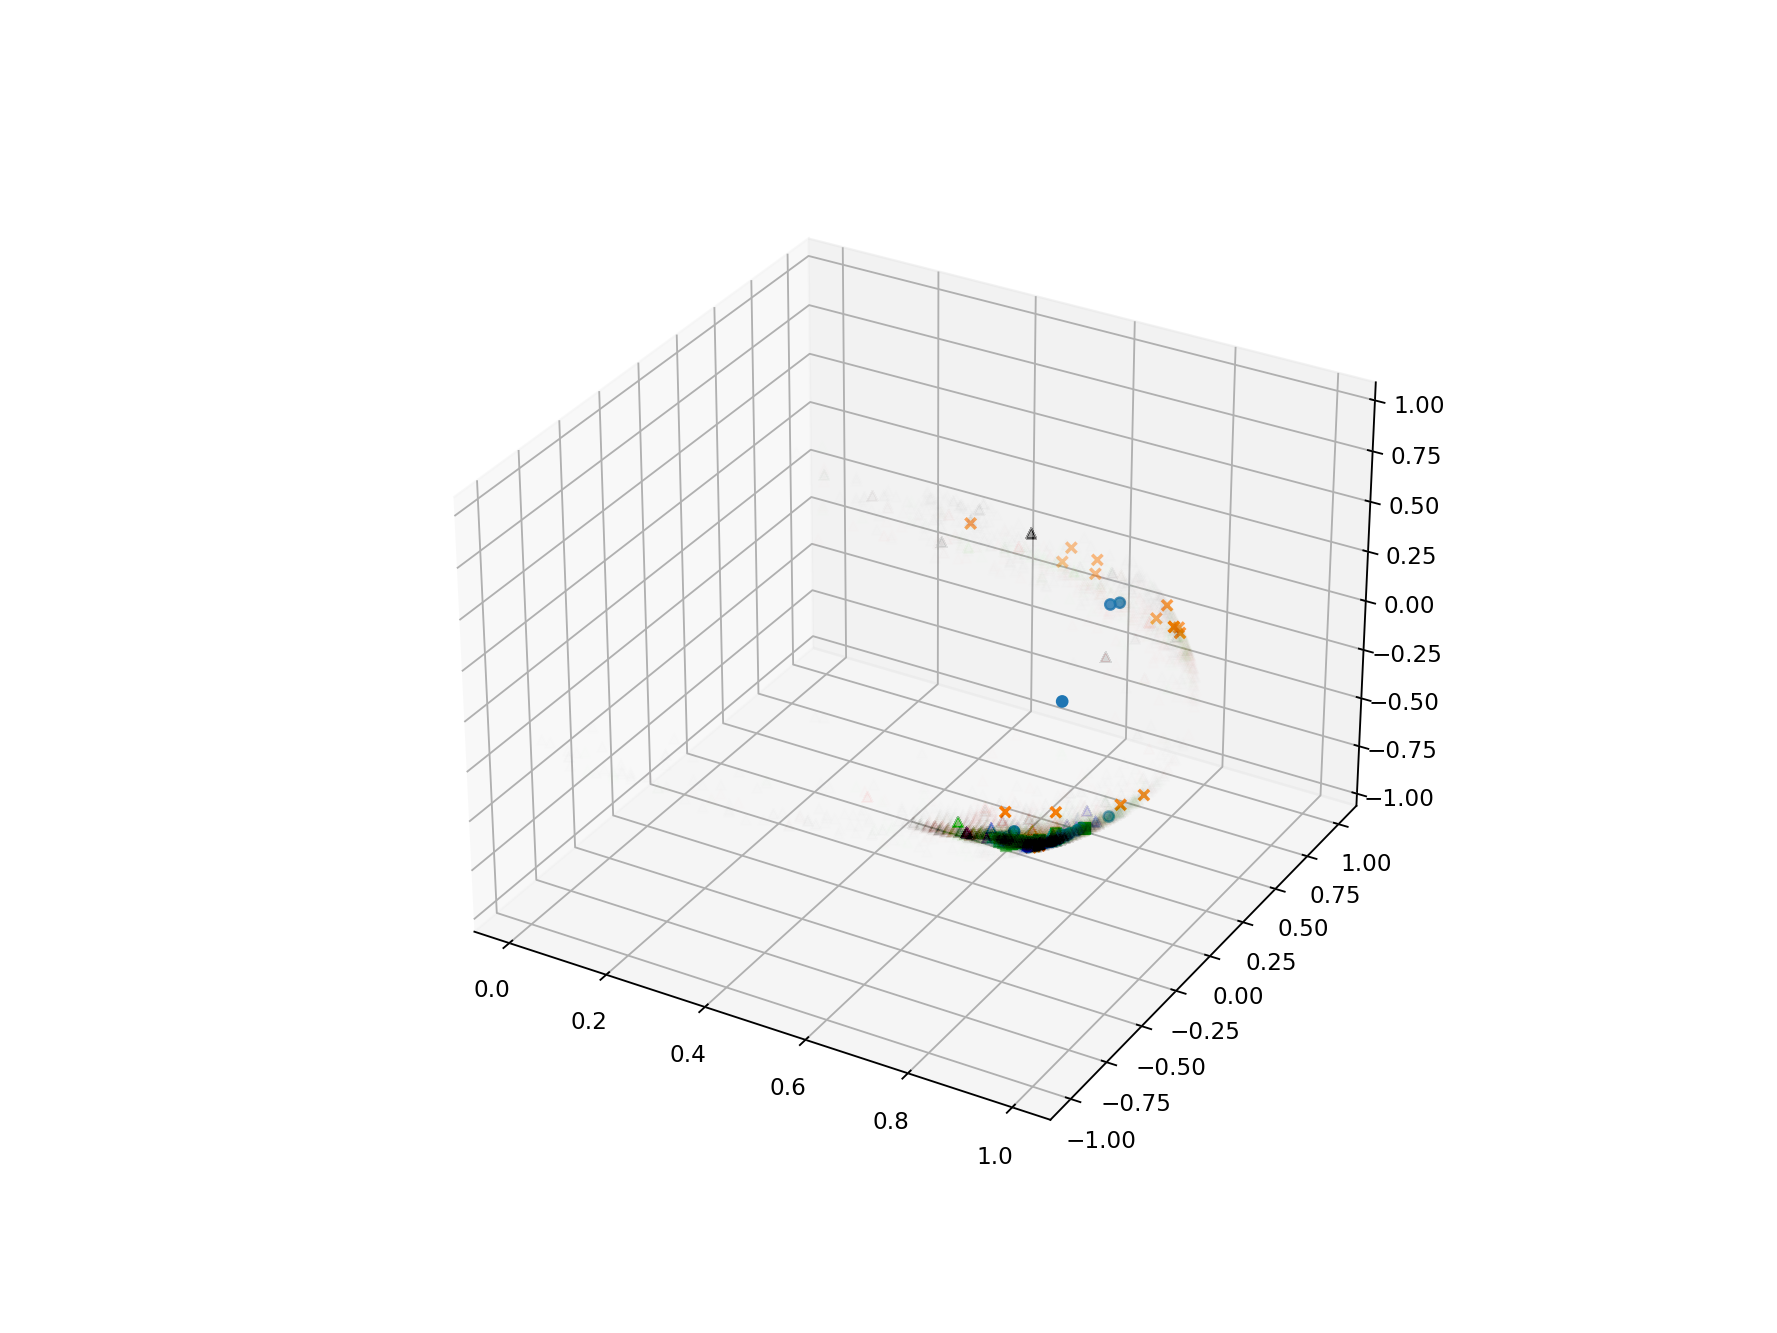

<IPython.core.display.Javascript object>


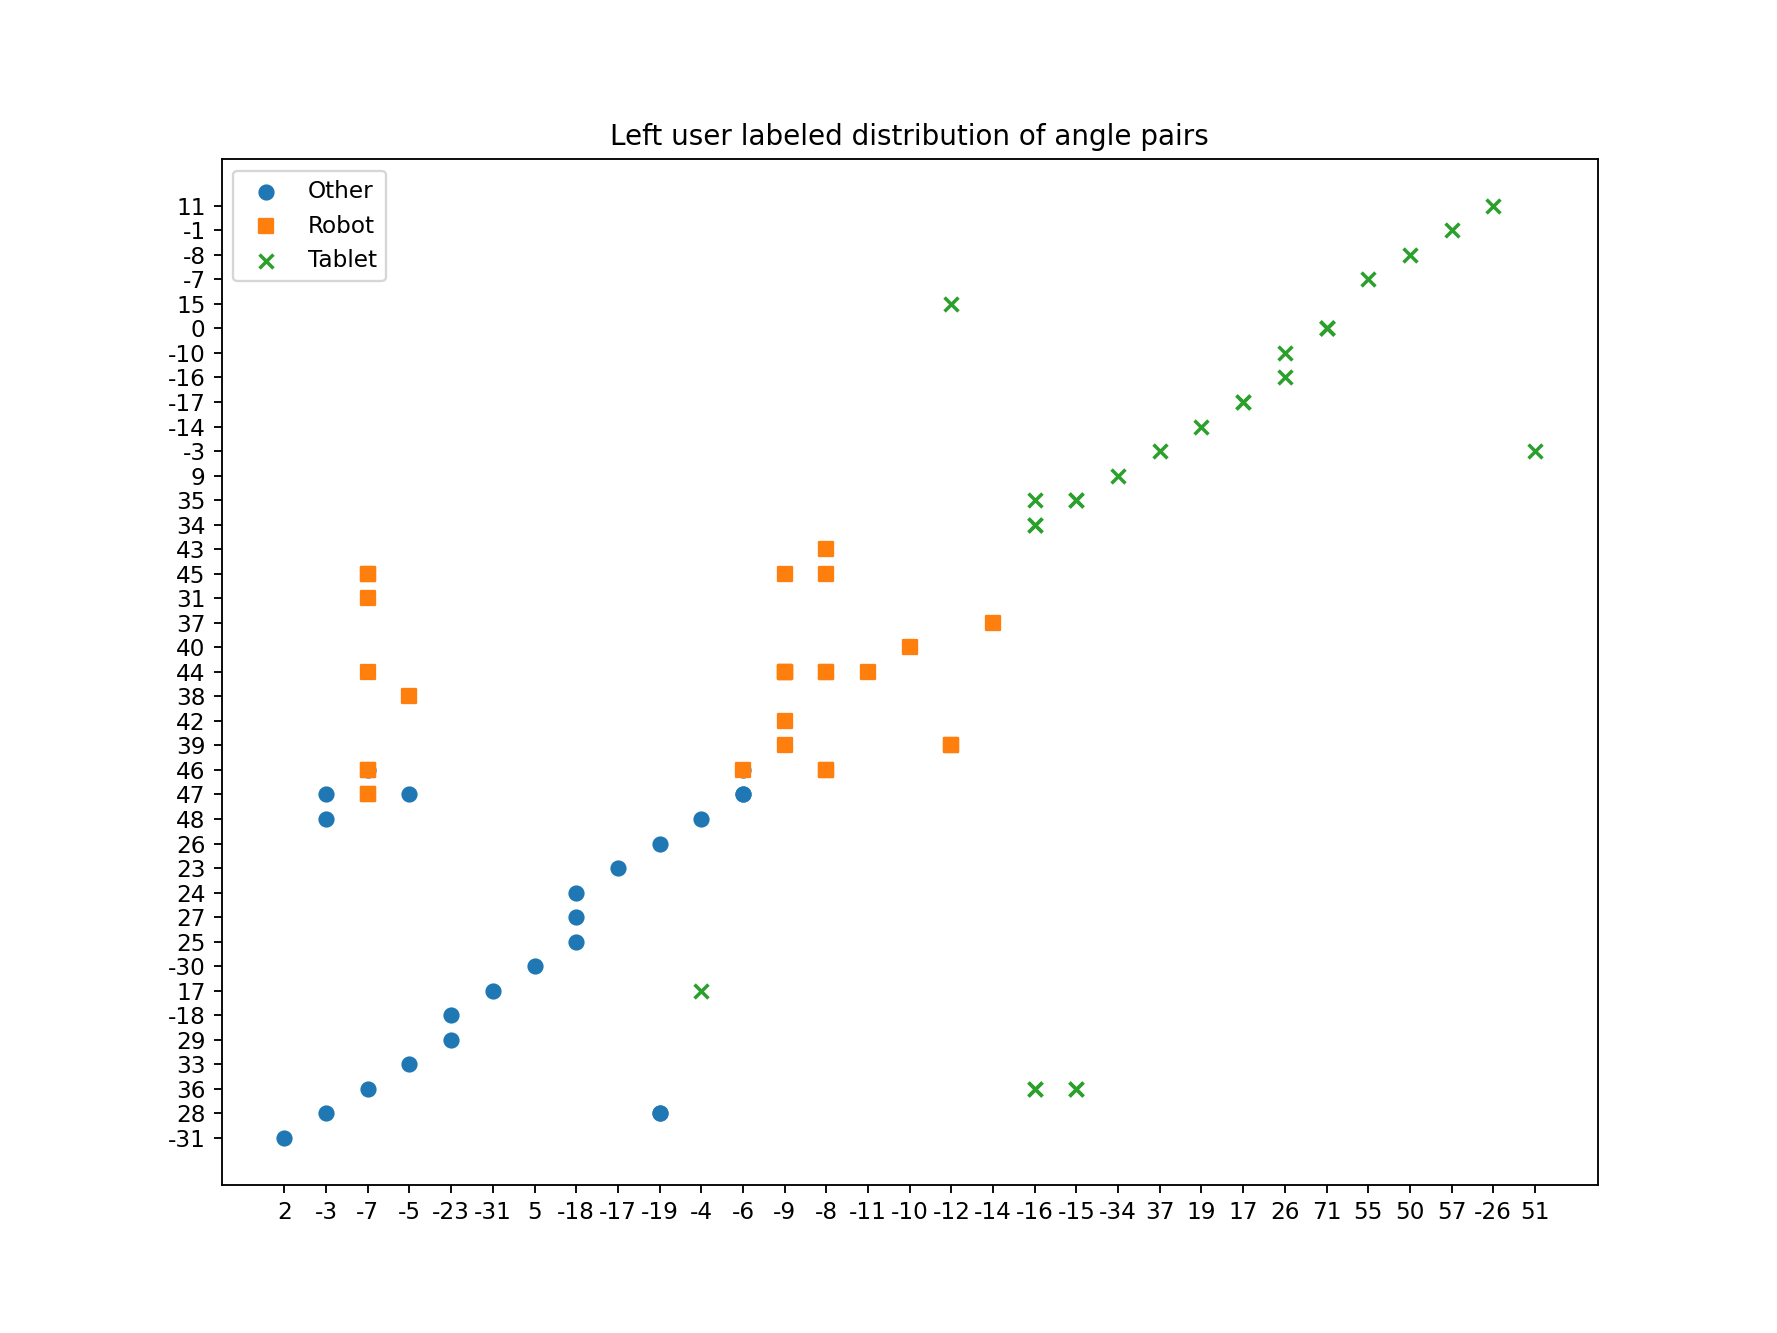

<IPython.core.display.Javascript object>


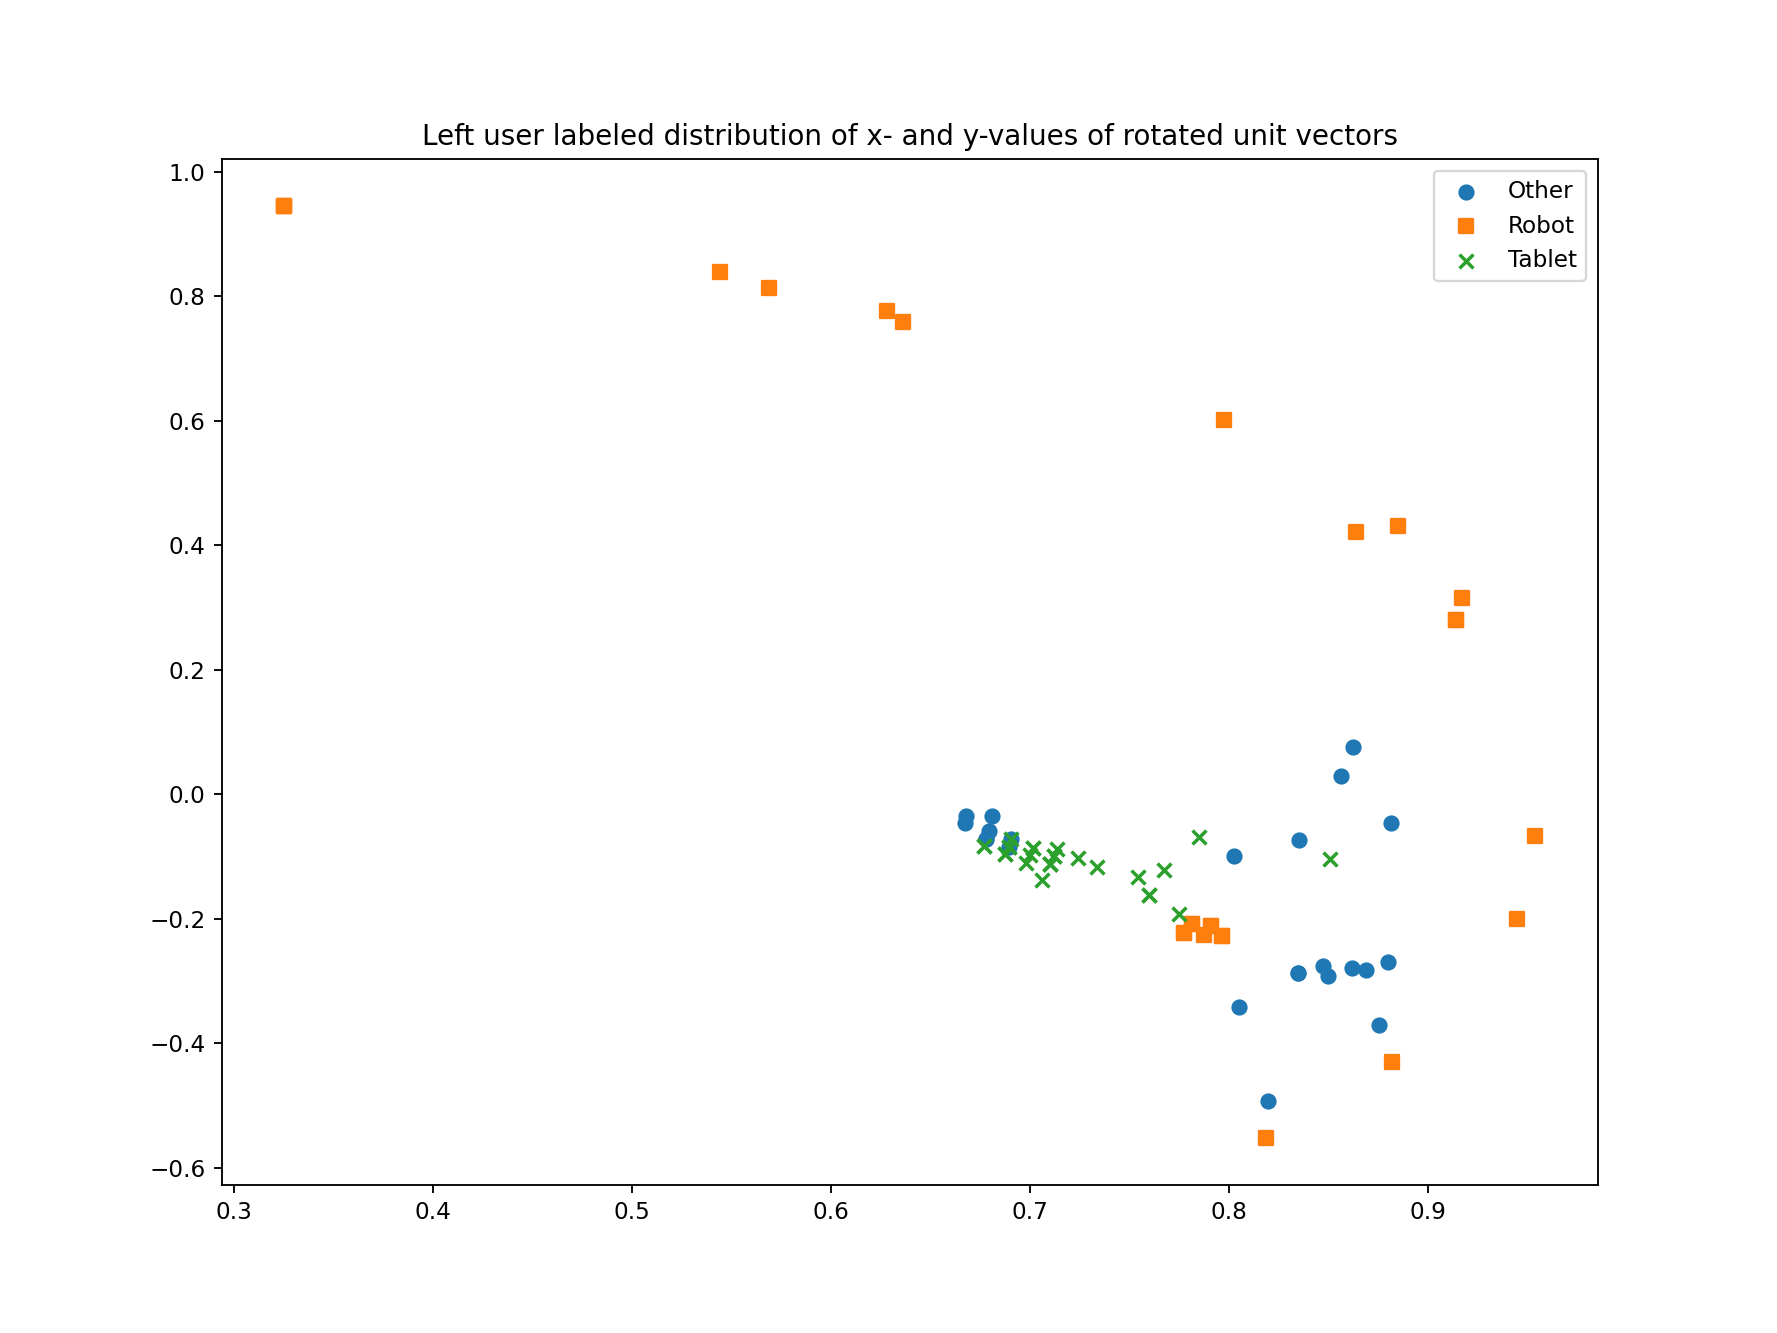

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(otherLeft[:,0], otherLeft[:,1], otherLeft[:,2], marker='o')
ax.scatter(tabletLeft[:,0], tabletLeft[:,1], tabletLeft[:,2], marker='x')
ax.scatter(robotLeft[:,0], robotLeft[:,1], robotLeft[:,2], marker='s')
time = np.array(anglesLeft[1:], float)[:,0]*(1/np.array(anglesLeft[1:], float)[np.array(anglesLeft[1:]).shape[0]-1,0])
ax.scatter(left[:,0], left[:,1], left[:,2], c=time, cmap=plt.cm.nipy_spectral, marker='^', alpha=0.005)
fig = plt.figure()
# plotting of labeled angles to get an overview on the distribution
plt.title("Left user labeled distribution of angle pairs")
plt.scatter(np.array(tarOtherLeft)[:,1], np.array(tarOtherLeft)[:,2], marker='o', label="Other")
plt.scatter(np.array(tarRobotLeft)[:,1], np.array(tarRobotLeft)[:,2], marker='s', label="Robot")
plt.scatter(np.array(tarTabLeft)[:,1], np.array(tarTabLeft)[:,2], marker='x', label="Tablet")
plt.legend()
fig = plt.figure()
# simple cutting of z axis to plot/project to 2D
plt.title("Left user labeled distribution of x- and y-values of rotated unit vectors")
plt.scatter(otherLeft[:,0], otherLeft[:,1], marker='o', label="Other")
plt.scatter(tabletLeft[:,0], tabletLeft[:,1], marker='s', label="Robot")
plt.scatter(robotLeft[:,0], robotLeft[:,1], marker='x', label="Tablet")
plt.legend()
#print(tarOtherLeft)

<IPython.core.display.Javascript object>


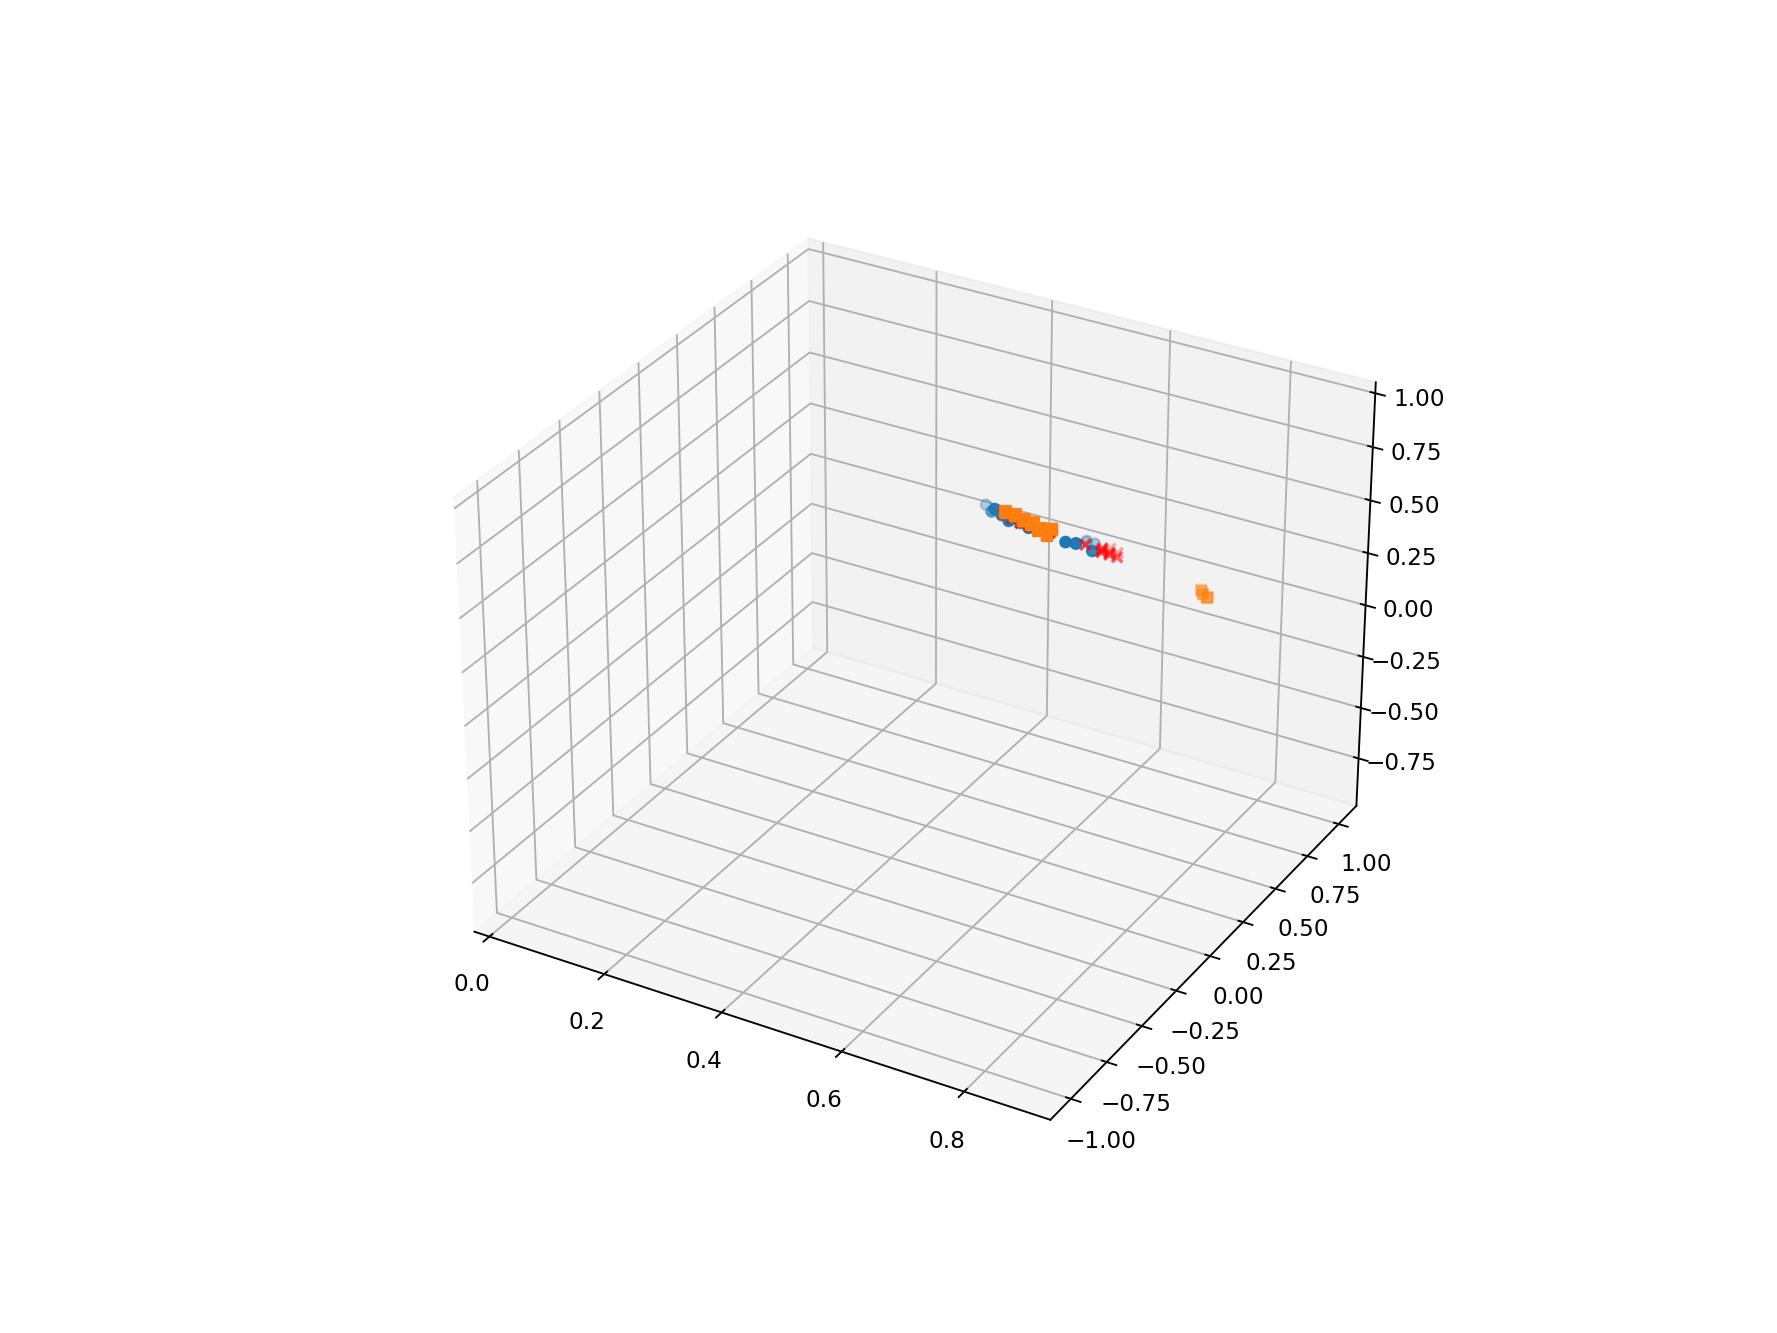

<IPython.core.display.Javascript object>


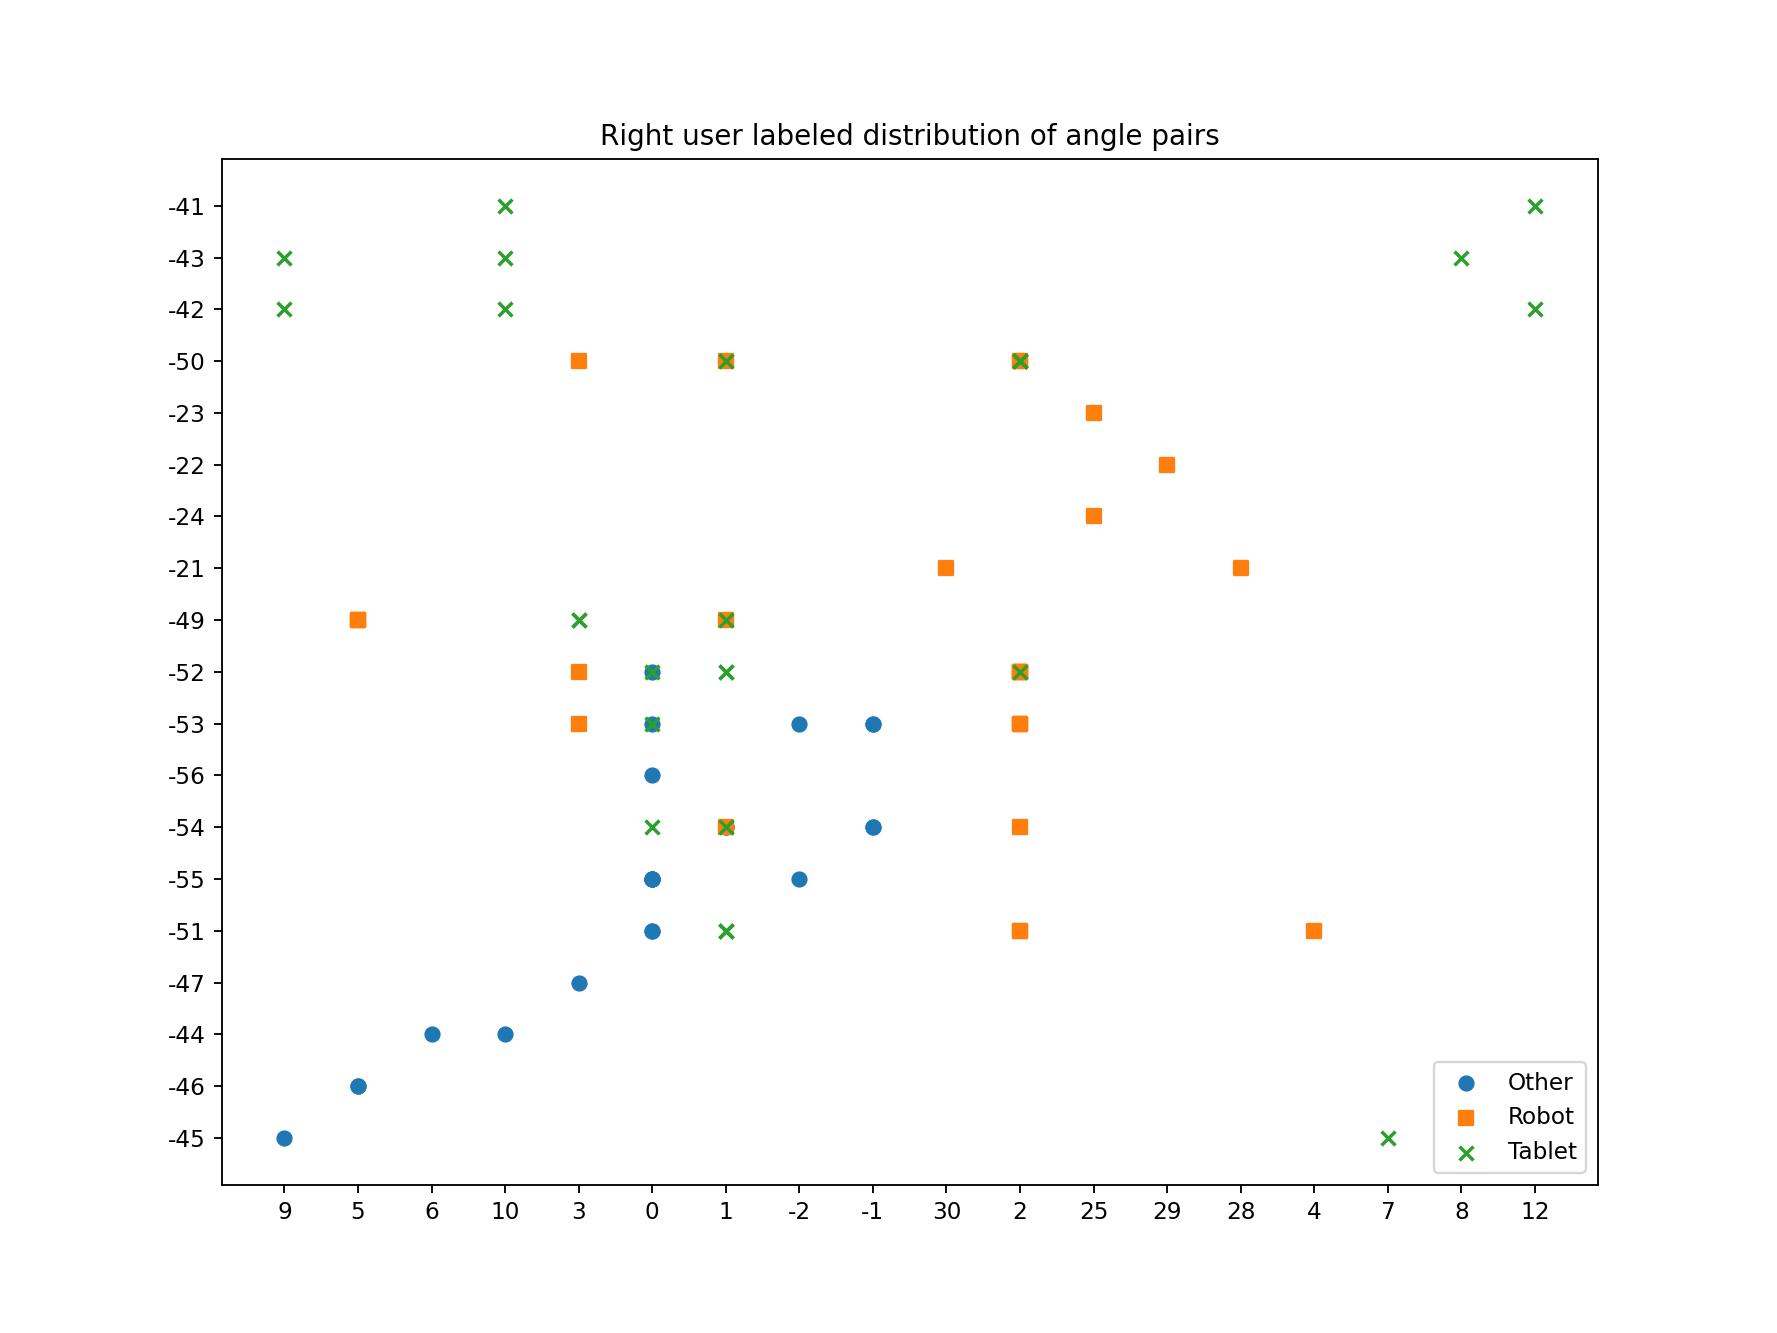

<IPython.core.display.Javascript object>


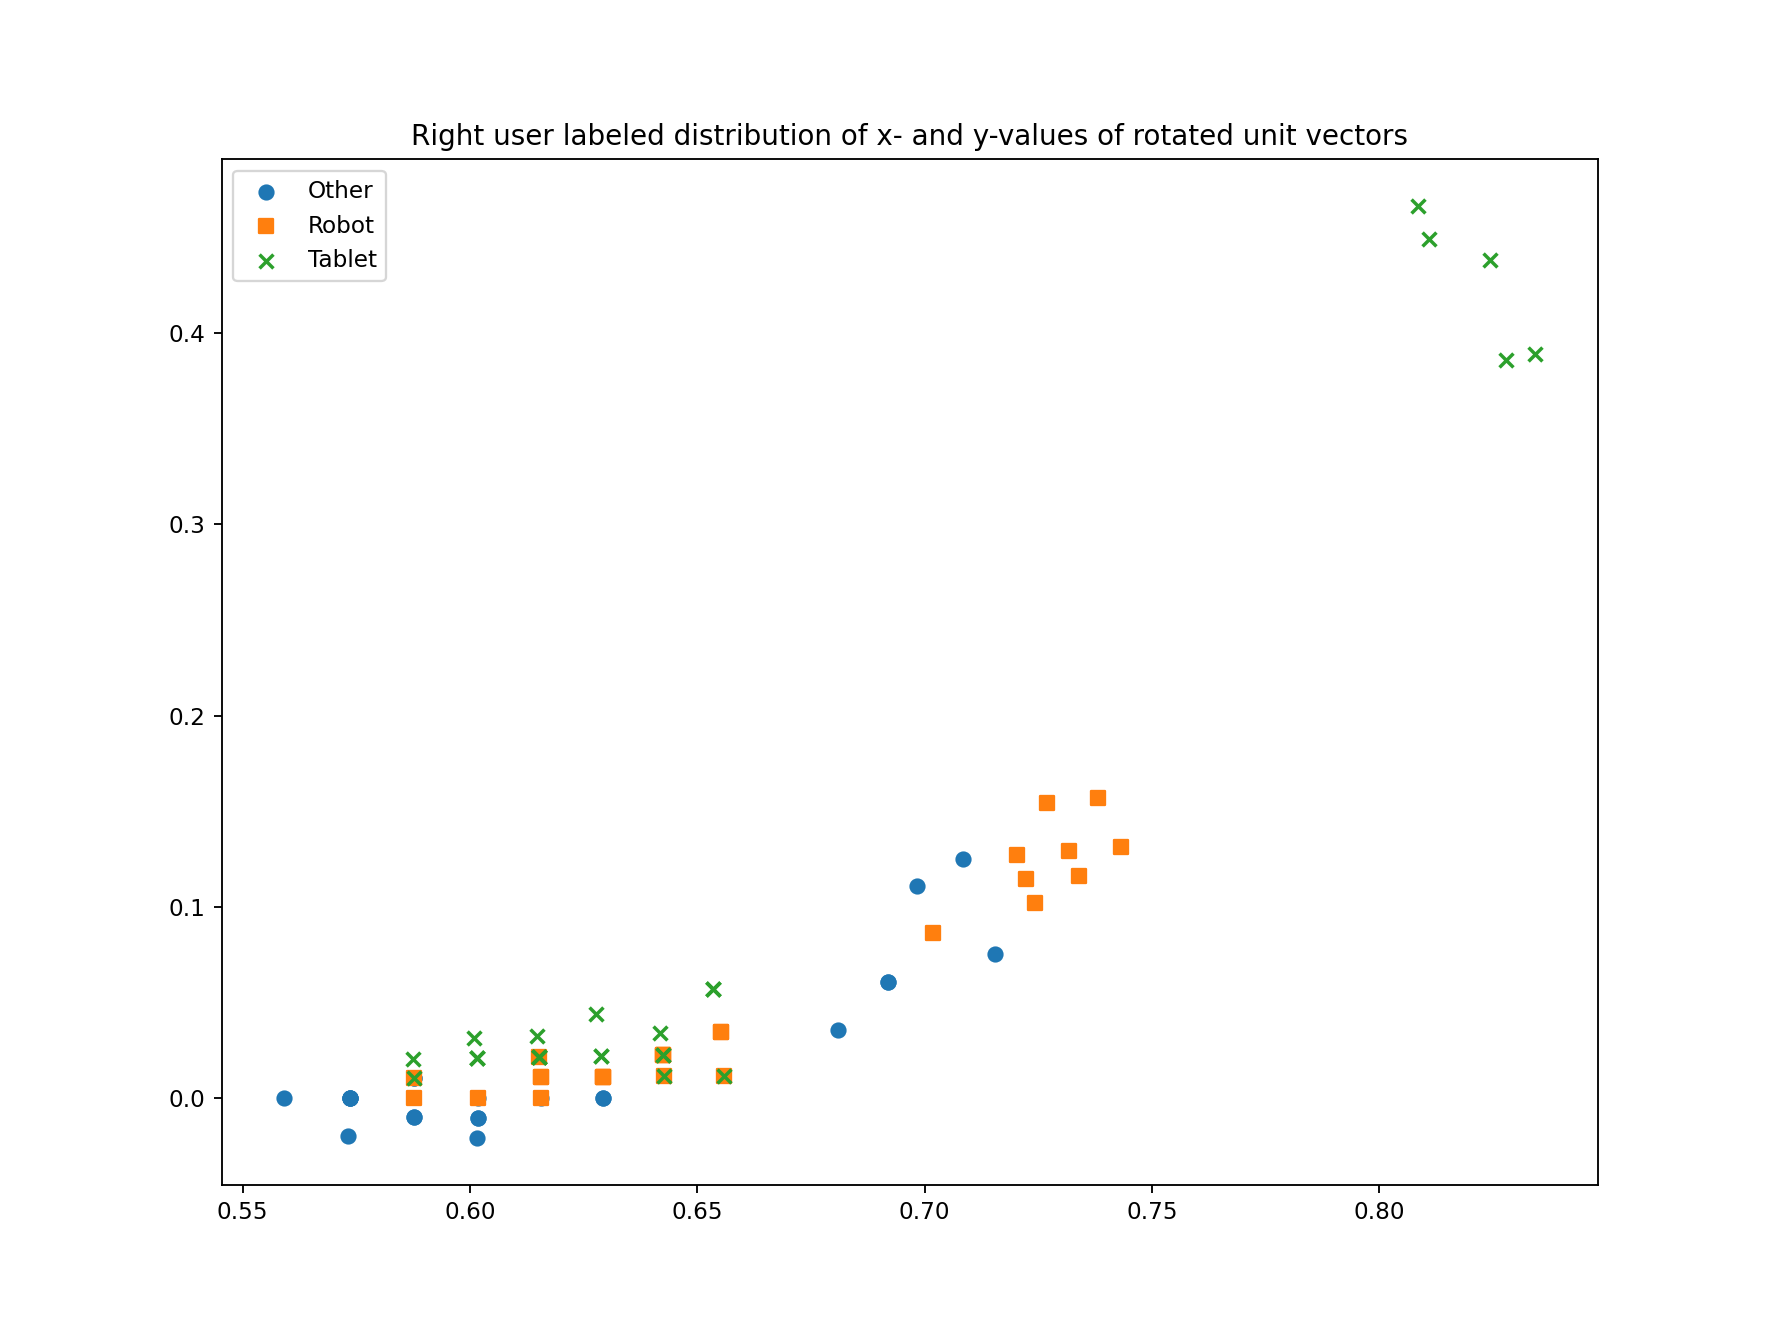

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(otherRight[:,0], otherRight[:,1], otherRight[:,2], marker='o')
ax.scatter(tabletRight[:,0], tabletRight[:,1], tabletRight[:,2], color='red',marker='x')
ax.scatter(robotRight[:,0], robotRight[:,1], robotRight[:,2], marker='s')
time = np.array(anglesRight[1:], float)[:,0]*(1/np.array(anglesRight[1:], float)[np.array(anglesRight[1:]).shape[0]-1,0])
ax.scatter(right[:,0], right[:,1], right[:,2], c=time, cmap=plt.cm.nipy_spectral,marker='^', alpha=0.001)
fig = plt.figure()
# plotting of labeled angles to get an overview on the distribution
plt.title("Right user labeled distribution of angle pairs")
plt.scatter(np.array(tarOtherRight)[:,1], np.array(tarOtherRight)[:,2], marker='o',label="Other")
plt.scatter(np.array(tarRobotRight)[:,1], np.array(tarRobotRight)[:,2], marker='s', label="Robot")
plt.scatter(np.array(tarTabRight)[:,1], np.array(tarTabRight)[:,2], marker='x', label="Tablet")
plt.legend()
fig = plt.figure()
# simple cutting of z axis to plot/project to 2D
plt.title("Right user labeled distribution of x- and y-values of rotated unit vectors")
plt.scatter(otherRight[:,0], otherRight[:,1],marker='o', label="Other")
plt.scatter(tabletRight[:,0], tabletRight[:,1],marker='s', label="Robot")
plt.scatter(robotRight[:,0], robotRight[:,1],marker='x',label="Tablet")
plt.legend()

In [66]:
### SVM training below, first data preparation


# different cells allow for trying different inputs to the SVMS, execute only one for testing purposes
########## 3D version that does not work :D ####################
X = np.append(otherLeft, robotLeft,0)
X = np.append(X, tabletLeft,0)
otherClass = np.zeros(otherLeft.shape[0])
y = np.append(otherClass, np.ones(robotLeft.shape[0]),0)
y = np.append(y, np.ones(tabletLeft.shape[0])*2, 0)
print(X.shape, otherLeft.shape, robotLeft.shape, tabletLeft.shape)
print(y.shape)
########## End ---- 3D version that does not work :D ####################

(76, 3, 1) (23, 3, 1) (27, 3, 1) (26, 3, 1)
(76,)


In [67]:
########## Pure angles in degrees as extracted from head pose analysis system ####################
X = np.append(np.array(tarOtherLeft, float)[:,1:], np.array(tarRobotLeft, float)[:,1:],0)
X = np.append(X, np.array(tarTabLeft, float)[:,1:],0)
X = X.reshape(X.shape[0:2])
otherClass = np.zeros(otherLeft.shape[0])
y = np.append(otherClass, np.ones(robotLeft.shape[0]),0)
y = np.append(y, np.ones(tabletLeft.shape[0])*2, 0)
print(X.shape, otherLeft.shape, robotLeft.shape, tabletLeft.shape)
print(y.shape)
########## End ---- Pure angles in degrees as extracted from head pose analysis system ####################

(76, 2) (23, 3, 1) (27, 3, 1) (26, 3, 1)
(76,)


In [68]:
########## Cutting z - 2D projection for left user ####################
X = np.append(otherLeft[:,0:2], robotLeft[:,0:2],0)
X = np.append(X, tabletLeft[:,0:2],0)
X = X.reshape(X.shape[0:2])
otherClass = np.zeros(otherLeft.shape[0])
y = np.append(otherClass, np.ones(robotLeft.shape[0]),0)
y = np.append(y, np.ones(tabletLeft.shape[0])*2, 0)
print(X.shape, otherLeft.shape, robotLeft.shape, tabletLeft.shape)
print(y.shape)
########## End ---- Cutting z - 2D projection for left user ####################

(76, 2) (23, 3, 1) (27, 3, 1) (26, 3, 1)
(76,)


In [69]:
########## Cutting z - 2D projection for right user ####################
X = np.append(otherRight[:,0:2], robotRight[:,0:2],0)
X = np.append(X, tabletRight[:,0:2],0)
X = X.reshape(X.shape[0:2])
otherClass = np.zeros(otherRight.shape[0])
y = np.append(otherClass, np.ones(robotRight.shape[0]),0)
y = np.append(y, np.ones(tabletRight.shape[0])*2, 0)
print(X.shape, otherRight.shape, robotRight.shape, tabletRight.shape)
print(y.shape)
########## End ---- Cutting z - 2D projection for right user ####################

(76, 2) (23, 3, 1) (27, 3, 1) (26, 3, 1)
(76,)


In [70]:
# split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [71]:
# code in the next 2 cells from SVM python tutorial on the iris dataset, modfications for models

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



Automatically created module for IPython interactive environment


<IPython.core.display.Javascript object>


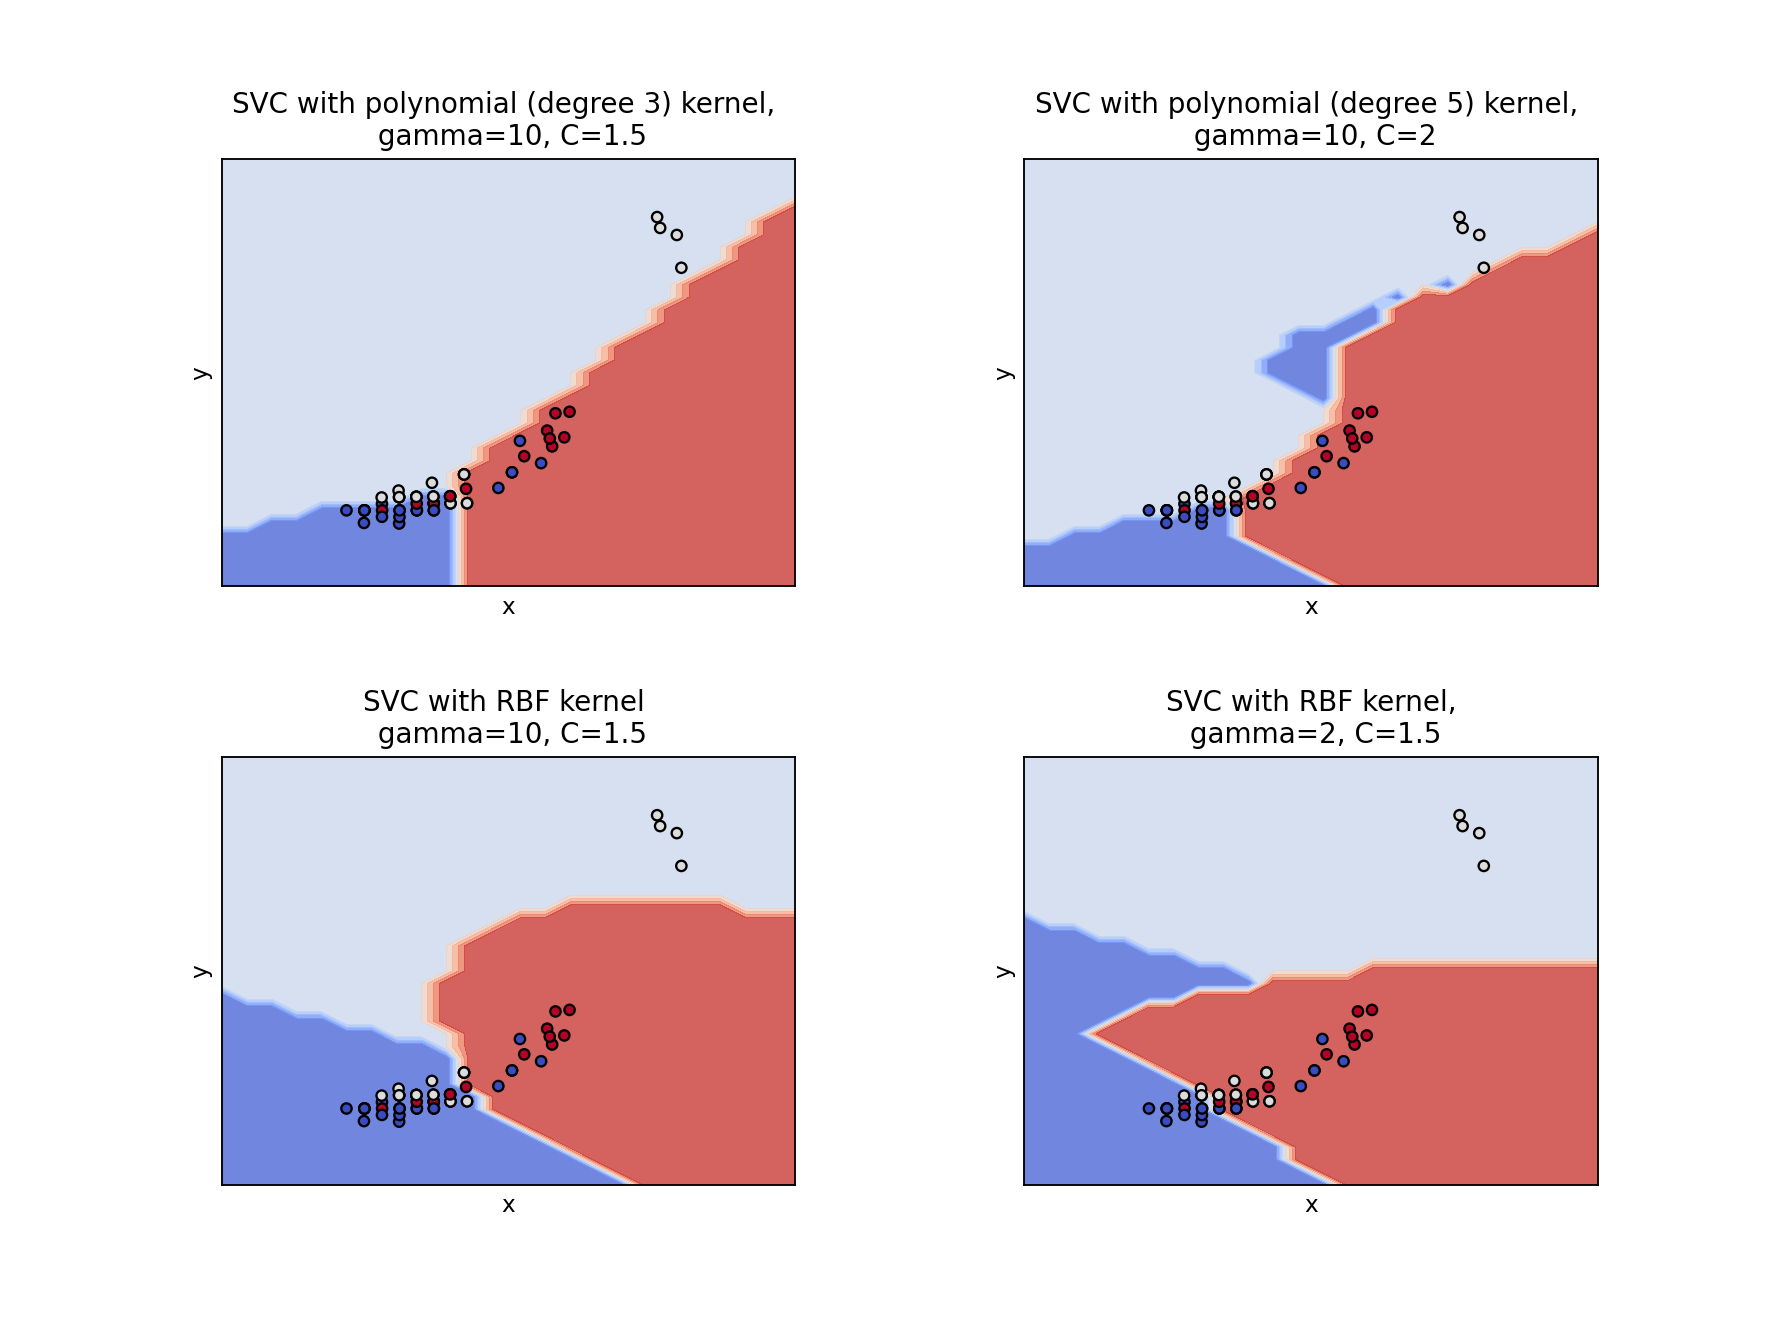

SVC with polynomial (degree 3) kernel, 
 gamma=10, C=1.5
Confusion matrix:
[[3 0 1]
 [4 2 0]
 [3 0 3]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       1.00      0.33      0.50         6
         2.0       0.75      0.50      0.60         6

    accuracy                           0.50        16
   macro avg       0.68      0.53      0.51        16
weighted avg       0.73      0.50      0.52        16

Score on test dataset:  0.5 

SVC with polynomial (degree 5) kernel, 
 gamma=10, C=2
Confusion matrix:
[[2 1 1]
 [0 4 2]
 [1 1 4]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57         4
         1.0       0.67      0.67      0.67         6
         2.0       0.57      0.67      0.62         6

    accuracy                           0.62        16
   macro avg       0.63      0.61      0.62        16
weighted avg 

In [72]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.5  # SVM regularization parameter, Sarah: decided to try different ones in the different models
models = (svm.SVC(kernel='poly', degree=3, gamma=10, C=1.5),#,
          svm.SVC(kernel='poly', degree=5, gamma=10, C=2),
          svm.SVC(kernel='rbf', gamma=10, C=1.5),
          svm.SVC(kernel='rbf', gamma=2, C=1.5))
         #svm.SVC(kernel='poly', degree=10, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with polynomial (degree 3) kernel, \n gamma=10, C=1.5', #'LinearSVC (linear kernel) no C')#,
          'SVC with polynomial (degree 5) kernel, \n gamma=10, C=2',
          'SVC with RBF kernel \n gamma=10, C=1.5',
          'SVC with RBF kernel,\n gamma=2, C=1.5')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    y_pred = clf.predict(X_test)
    print(title)
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Score on test dataset: ", clf.score(X_test, y_test), "\n")
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
plt.savefig("svm_right_5455_2.png",dpi=150)

In [73]:
# unused so far
#f = open("leftAnnotationsSVM5455.txt", "w")

#for angles in anglesLeft:
#    tier = "left"
#    clf = modesl[2]
#    classPr = clf.predict([np.array(angles[1:])])
#    f.write()
#f.close

[['time_elapsed (s)', 'right angle vertical', 'right angle horizontal'], ['0.1', '5', '-50'], ['0.2', '4', '-50'], ['0.3333333333333333', '2', '-52'], ['0.43333333333333335', '3', '-51'], ['0.5666666666666667', '3', '-51'], ['0.7', '4', '-52'], ['0.8', '4', '-51'], ['0.9333333333333333', '4', '-51'], ['1.0666666666666667', '3', '-52'], ['1.1666666666666667', '1', '-53'], ['1.3', '0', '-54'], ['1.4333333333333333', '0', '-45'], ['1.5666666666666667', '0', '-56'], ['1.6666666666666667', '-2', '-54'], ['1.8', '0', '-55'], ['1.9333333333333333', '0', '-55'], ['2.0666666666666664', '-4', '-56'], ['2.1666666666666665', '-2', '-55'], ['2.2666666666666666', '0', '-56'], ['2.3666666666666667', '-1', '-54'], ['2.466666666666667', '-1', '-56'], ['2.6', '-1', '-55'], ['2.7', '-1', '-56'], ['2.8333333333333335', '1', '-54'], ['2.966666666666667', '4', '-53'], ['3.1', '3', '-54'], ['3.2', '6', '-52'], ['3.3333333333333335', '8', '-51'], ['3.466666666666667', '6', '-53'], ['3.6', '7', '-53'], ['3.733

<IPython.core.display.Javascript object>


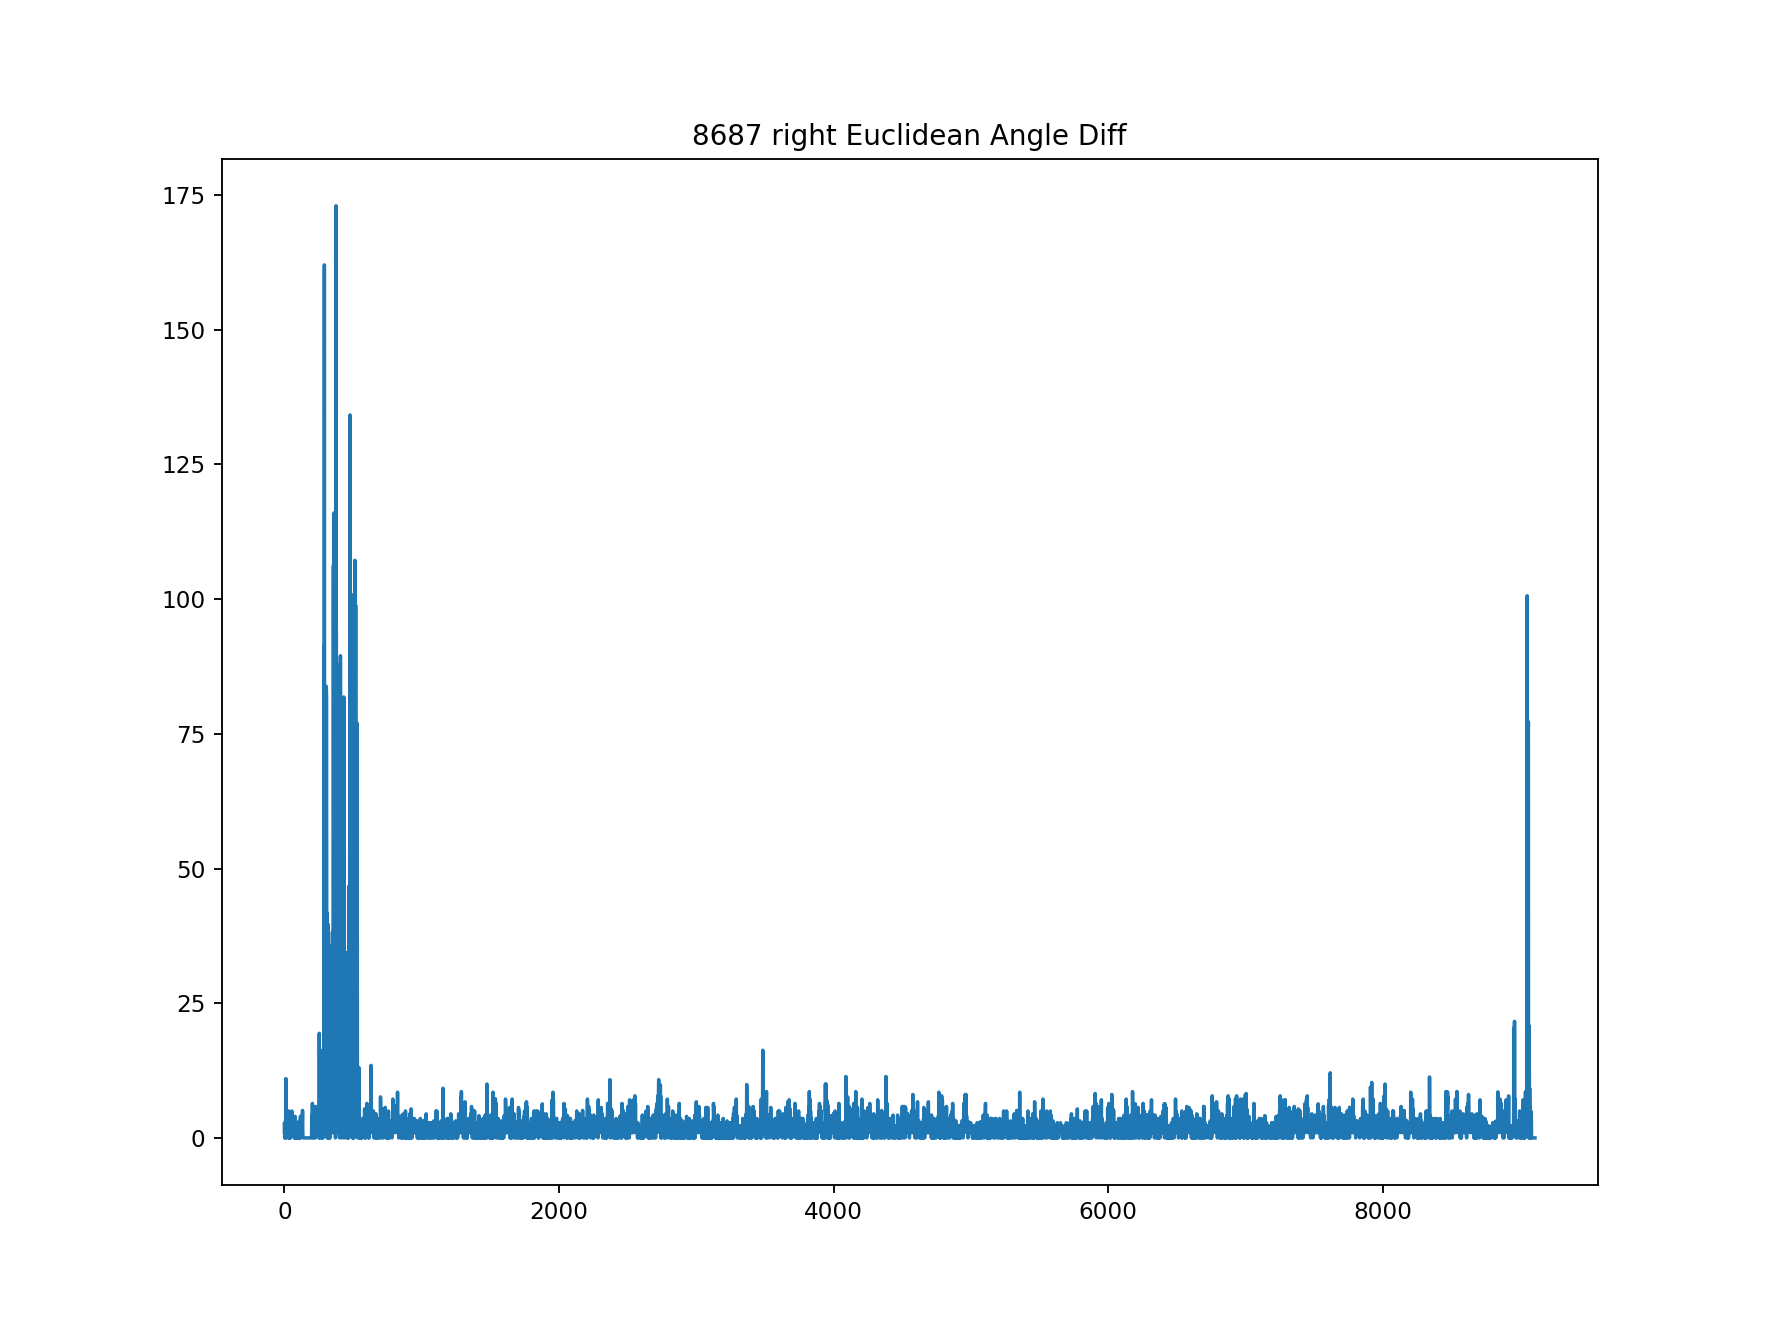

In [91]:
# to get the overview on the right user, exchange anglesLeft to anglesRight
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

#leftDiff = np.array([0 if np.linalg.norm(a-b)>0.2 else np.linalg.norm(a-b) for a,b in zip(right[:-1,:], right[1:,:])], 'float')
#leftDiff = np.array([np.linalg.norm(a-b) for a,b in zip(left[:-1,:], left[1:,:])], 'float')
leftAngleDiff = np.array([np.linalg.norm(a-b) for a,b in zip(np.array(anglesRight[1:], 'float')[:-1,1:], np.array(anglesRight[1:], 'float')[1:,1:])], 'float')
mov_average = moving_average(leftAngleDiff, 10)
#plt.figure()
print(anglesRight[:])
plt.plot(np.arange(mov_average.shape[0]), mov_average)
#plt.ylim(top=0.3)
plt.figure()
plt.plot(np.arange(leftAngleDiff.shape[0]), leftAngleDiff)
plt.title("8687 right Euclidean Angle Diff")
plt.savefig("8687_right_angle_diff.png", dpi=150)

In [23]:
# some tries to correct for noise but doesn't work
leftAngleDiff = np.array([np.linalg.norm(a-b) for a,b in zip(np.array(anglesLeft[1:], 'float')[:-1,1:], np.array(anglesLeft[1:], 'float')[1:,1:])], 'float')
anglesToChange = np.array(anglesLeft[1:], 'float')[:, 1:]
for i in range(leftAngleDiff.shape[0]):
    if leftAngleDiff[i] > 30:
        anglesToChange[i+1] = anglesToChange[i+1]*-1.0
        if anglesToChange.shape[0] > i+3:
            leftAngleDiff[i+1] = np.linalg.norm(anglesToChange[i+1]-anglesToChange[i+2])
for i in range(leftAngleDiff.shape[0]):
    if leftAngleDiff[i] > 30:
        anglesToChange[i+1][0] = anglesToChange[i+1][0]*-1.0
        if anglesToChange.shape[0] > i+3:
            leftAngleDiff[i+1] = np.linalg.norm(anglesToChange[i+1]-anglesToChange[i+2])
for i in range(leftAngleDiff.shape[0]):
    if leftAngleDiff[i] > 30:
        anglesToChange[i+1][1] = anglesToChange[i+1][1]*-1.0
        if anglesToChange.shape[0] > i+3:
            leftAngleDiff[i+1] = np.linalg.norm(anglesToChange[i+1]-anglesToChange[i+2])
leftAngleDiff = np.array([np.linalg.norm(a-b) for a,b in zip(anglesToChange[:-1,:], anglesToChange[1:,:])])
plt.plot(np.arange(leftAngleDiff.shape[0]), leftAngleDiff)
plt.title("5455 left Euclidean Angle Diff")
plt.savefig("5455_left_angle_diff_corrected.png", dpi=150)

In [24]:
print(leftAngleDiff.shape)
print(anglesToChange.shape)

(8744,)
(8745, 2)


<IPython.core.display.Javascript object>


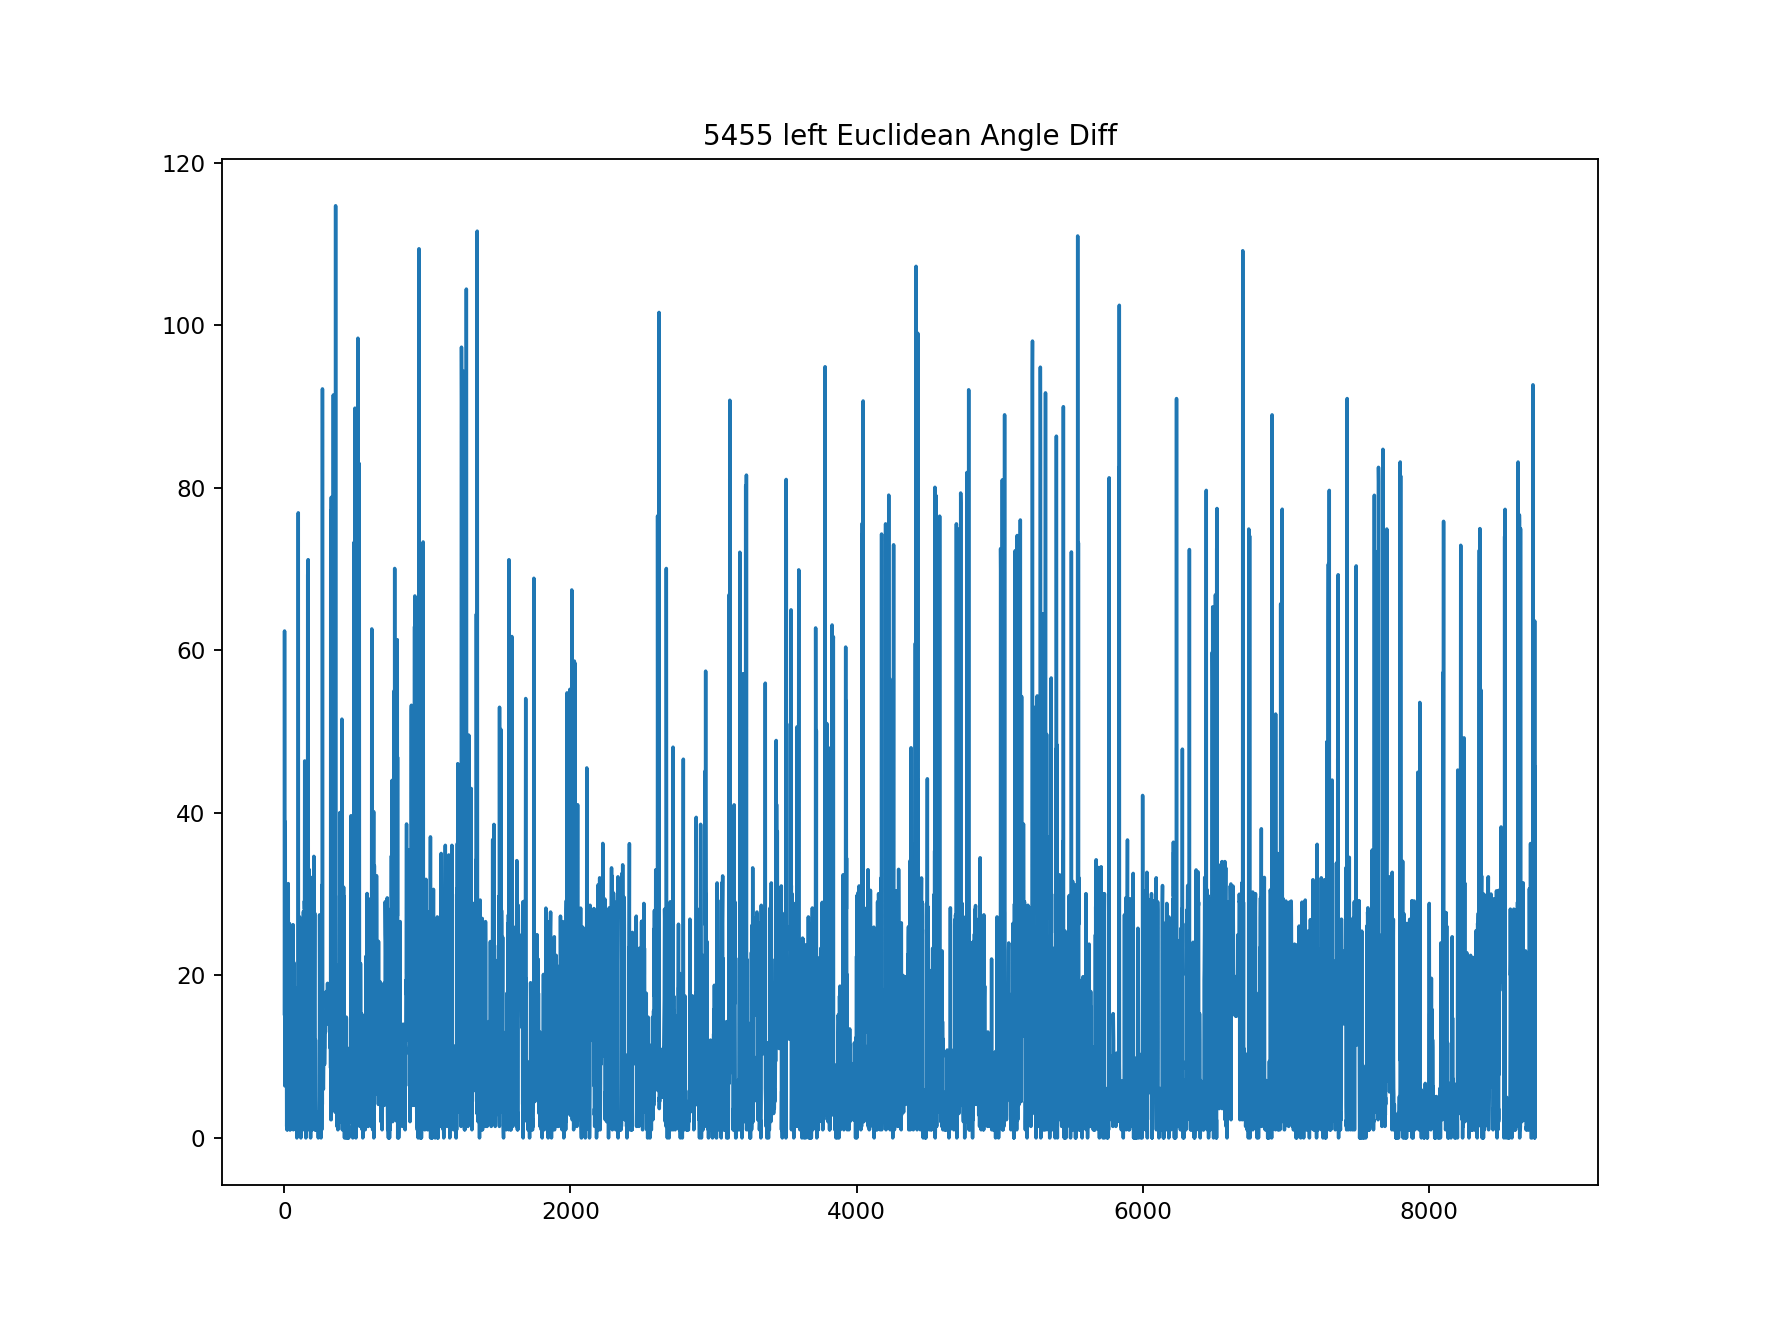

Text(0.5, 1.0, '5455 left Euclidean Angle Diff')

In [25]:
plt.figure()
plt.plot(np.arange(leftAngleDiff.shape[0]), leftAngleDiff)
plt.title("5455 left Euclidean Angle Diff")